In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
!pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\ivan\anaconda3\lib\site-packages (0.23.2)


In [2]:
# Rodando o dataset
police0 = pd.read_csv('police_use_of_force.csv')
police0.head()

,X,Y,PoliceUseOfForceID,CaseNumber,ResponseDate,Problem,Is911Call,PrimaryOffense,SubjectInjury,ForceReportNumber,...,TotalCityCallsForYear,TotalPrecinctCallsForYear,TotalNeighborhoodCallsForYear,CenterGBSID,CenterLatitude,CenterLongitude,CenterX,CenterY,DateAdded,OBJECTID
0,-93.273141,44.980808,15928382,08-000149,2008/01/01 01:29:47+00,Code 3,No,MISC,NaN,1,...,322402,46998.0,23458,17121,44.980808,-93.273141,-1.038312e+07,5.618501e+06,2020/11/02 08:18:49+00,1
1,-93.251092,44.961813,15928383,08-012774,2008/01/13 03:21:52+00,Suspicious Vehicle,No,FLEE,No,2,...,322402,84018.0,10316,17023,44.961813,-93.251092,-1.038066e+07,5.615512e+06,2020/11/02 08:18:49+00,2
2,-93.266112,44.974295,15928384,08-019237,2008/01/20 03:47:57+00,Unwanted Person,Yes,OBSTRU,No,3,...,322402,46998.0,23458,21739,44.974295,-93.266112,-1.038234e+07,5.617476e+06,2020/11/02 08:18:49+00,3
3,-93.295639,45.000883,15928385,08-030704,2008/02/01 06:15:20+00,Attempt Pick-Up,No,CHLDAB,NaN,2,...,322402,80434.0,15344,22445,45.000883,-93.295639,-1.038562e+07,5.621661e+06,2020/11/02 08:18:49+00,4
4,-93.290726,45.013029,15928386,08-038956,2008/02/09 03:49:09+00,Neighbor Trouble,Yes,OBSTRU,Yes,2,...,322402,80434.0,13679,25902,45.013029,-93.290726,-1.038508e+07,5.623573e+06,2020/11/02 08:18:49+00,5


In [3]:
police0.shape

(33257, 30)

# Minerando dados

In [4]:
# Filtrando o dataset para remover entradas indesejdas cujos resultados não são proveitosos para o modelo:
police1 = police0.drop(columns=['X', 'Y', 'ForceTypeAction', 'PoliceUseOfForceID', 'CaseNumber', 'ResponseDate', 'ForceReportNumber', 'SubjectRole', 'SubjectRoleNumber', 'CenterGBSID', 'OBJECTID', 'DateAdded', 'CenterX', 'CenterY', 'CenterLatitude', 'CenterLongitude'])

**Variáveis retiradas**
* Dados relacionados a latitude e longitude foram desconsiderados, uma vez que para a análise os dados de localização baseado em distrito policial e bairro são mais proveitosos para que a análise não se torne muito complexa, uma vez que o intuito do modelo não é ver atitudes policiais em pontos muito específicos.
* As features PoliceUseOfForceID, CaseNumber, ResponseDate, ForceReportNumber, SubjectRole, SubjectRoleNumber, CenterGBSID, OBJECTID, DateAdded foram desconsideradas por se tratarem de códigos policiais que não são necessários para a análise.
* A feature ForceTypeAction foi desconsiderada pois será considerado os casos genéricos de "agressões" na feature ForceType.

In [5]:
police1.head()

,Problem,Is911Call,PrimaryOffense,SubjectInjury,ForceType,Race,Sex,EventAge,TypeOfResistance,Precinct,Neighborhood,TotalCityCallsForYear,TotalPrecinctCallsForYear,TotalNeighborhoodCallsForYear
0,Code 3,No,MISC,NaN,Bodily Force,White,Male,39.0,Commission of Crime,01,Downtown West,322402,46998.0,23458
1,Suspicious Vehicle,No,FLEE,No,Bodily Force,Black,Male,30.0,Fled in Vehicle,03,Ventura Village,322402,84018.0,10316
2,Unwanted Person,Yes,OBSTRU,No,Bodily Force,Black,Male,40.0,Commission of Crime,01,Downtown West,322402,46998.0,23458
3,Attempt Pick-Up,No,CHLDAB,NaN,Bodily Force,Black,Female,35.0,Commission of Crime,04,Jordan,322402,80434.0,15344
4,Neighbor Trouble,Yes,OBSTRU,Yes,Bodily Force,Black,Male,46.0,Tensed,04,Hawthorne,322402,80434.0,13679


**Descrevendo variáveis restantes**

* Problem: Tipo de problema
* Is911Call: se o caso foi denúncia por ligação
    - No: Não foi denúncia por ligação
    - Yes: foi denúncia por ligação
* PrimaryOffense: Qual a primeira passagem pela polícia
* SubjectInjury: Se o indivíduo já estava machucado antes da intervenção policial
    - No: Não estava machucado
    - Yes: Estava machucado
* ForceType: Tipo de agressão
    - Bodily Force                  
    - Taser                         
    - Chemical Irritant              
    - Gun Point Display              
    - Improvised Weapon              
    - Police K9 Bite                 
    - Baton                          
    - Firearm                       
    - Maximal Restraint Technique    
    - Less Lethal Projectile         
    - Less Lethal      
* Race: Tipo de raça
* Sex: Tipo de sexo
* EventAge: Idade do indivíduo
* TypeOfResistance: 
* Precinct: Distrito Policial
    - 01
    - 02
    - 03
    - 04
    - 05
* Neighborhood: Bairro
* TotalCityCallsForYear: Total de ligação por ano da cidade
* TotalPrecinctCallsForYear: Total de ligações por ano do distrito
* TotalNeighborhoodCallsForYear: Total de ligações por ano do bairro

Iremos usar a variável *ForceType* como target, pois ela nos dá os tipos de força usada por policiais.

## Tabelas comparativas entre a target e as demais features considerando todos os valores

In [6]:
# Tabela cruzada para Raça:
pd.crosstab(police1['ForceType'], police1['Race'], normalize = 'index').round(3)

Race,Asian,Black,Native American,Other / Mixed Race,Pacific Islander,Unknown,White,not recorded
ForceType,,,,,,,,
Baton,0.034,0.603,0.052,0.069,0.000,0.052,0.190,0.000
Bodily Force,0.013,0.615,0.054,0.036,0.000,0.017,0.258,0.007
Chemical Irritant,0.022,0.651,0.029,0.043,0.000,0.054,0.166,0.035
Firearm,0.023,0.523,0.023,0.000,0.000,0.000,0.205,0.227
Gun Point Display,0.018,0.699,0.064,0.057,0.000,0.000,0.155,0.007
Improvised Weapon,0.003,0.669,0.057,0.037,0.000,0.014,0.220,0.000
Less Lethal,0.000,0.104,0.104,0.000,0.000,0.438,0.354,0.000
Less Lethal Projectile,0.000,0.438,0.062,0.125,0.000,0.000,0.375,0.000
Maximal Restraint Technique,0.000,0.618,0.056,0.000,0.014,0.049,0.264,0.000


In [7]:
# Tabela para Sexo:
pd.crosstab(police1['ForceType'], police1['Sex'], normalize = 'index').round(3)

Sex,Female,Male,Unknown,not recorded
ForceType,,,,
Baton,0.069,0.897,0.034,0.000
Bodily Force,0.114,0.880,0.003,0.003
Chemical Irritant,0.256,0.684,0.027,0.032
Firearm,0.045,0.864,0.000,0.091
Gun Point Display,0.014,0.986,0.000,0.000
Improvised Weapon,0.089,0.911,0.000,0.000
Less Lethal,0.042,0.688,0.271,0.000
Less Lethal Projectile,0.000,1.000,0.000,0.000
Maximal Restraint Technique,0.208,0.792,0.000,0.000


In [8]:
# Tabela para tipo de resistência:
pd.crosstab(police1['ForceType'], police1['TypeOfResistance'], normalize = 'index').round(3)

TypeOfResistance,Assaulted Officer,Assaulted Officer,Assaulted Police Horse,Assaulted Police K9,Assaulting Police Horse,Assaulting Police K9,COMMISSION OF CRIME,Commission of Crime,Commission of a Crime,Fled in Vehicle,...,Other,TENSED,Tensed,Tensed,Unspecified,Verbal Non-Compliance,Verbal Non-Compliance,commission of crime,tensed,verbal non-compliance
ForceType,,,,,,,,,,,,,,,,,,,,,
Baton,0.103,0.017,0.000,0.0,0.000,0.000,0.0,0.345,0.000,0.017,...,0.000,0.000,0.155,0.000,0.103,0.069,0.000,0.000,0.0,0.0
Bodily Force,0.104,0.021,0.000,0.0,0.002,0.000,0.0,0.148,0.018,0.026,...,0.032,0.000,0.275,0.049,0.068,0.070,0.017,0.000,0.0,0.0
Chemical Irritant,0.034,0.008,0.000,0.0,0.002,0.000,0.0,0.393,0.042,0.003,...,0.030,0.000,0.104,0.007,0.104,0.199,0.028,0.004,0.0,0.0
Firearm,0.209,0.000,0.000,0.0,0.000,0.000,0.0,0.372,0.000,0.023,...,0.000,0.000,0.140,0.000,0.163,0.047,0.000,0.000,0.0,0.0
Gun Point Display,0.055,0.000,0.000,0.0,0.000,0.000,0.0,0.269,0.000,0.077,...,0.000,0.002,0.169,0.000,0.091,0.148,0.000,0.000,0.0,0.0
Improvised Weapon,0.134,0.020,0.000,0.0,0.003,0.000,0.0,0.178,0.015,0.087,...,0.020,0.000,0.155,0.000,0.050,0.076,0.006,0.000,0.0,0.0
Less Lethal,0.000,0.578,0.022,0.0,0.000,0.000,0.0,0.000,0.089,0.000,...,0.244,0.000,0.000,0.000,0.000,0.000,0.022,0.000,0.0,0.0
Less Lethal Projectile,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.438,0.000,0.000,...,0.000,0.000,0.000,0.000,0.188,0.188,0.000,0.000,0.0,0.0
Maximal Restraint Technique,0.000,0.191,0.000,0.0,0.000,0.000,0.0,0.000,0.061,0.000,...,0.351,0.000,0.000,0.214,0.000,0.000,0.107,0.000,0.0,0.0


In [9]:
# Tabela para Idade:
pd.crosstab(police1['ForceType'], police1['EventAge'], normalize = 'index').round(3)

EventAge,0.0,6.0,7.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,...,66.0,67.0,69.0,70.0,71.0,72.0,73.0,74.0,77.0,82.0
ForceType,,,,,,,,,,,,,,,,,,,,,
Baton,0.018,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
Bodily Force,0.004,0.000,0.0,0.0,0.0,0.0,0.001,0.005,0.008,0.016,...,0.001,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
Chemical Irritant,0.096,0.001,0.0,0.0,0.0,0.0,0.001,0.003,0.012,0.015,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
Firearm,0.163,0.000,0.0,0.0,0.0,0.0,0.000,0.023,0.000,0.000,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
Gun Point Display,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.005,0.011,0.016,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.002,0.0
Improvised Weapon,0.003,0.000,0.0,0.0,0.0,0.0,0.000,0.003,0.012,0.012,...,0.003,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
Less Lethal,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
Less Lethal Projectile,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
Maximal Restraint Technique,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.007,0.000,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0


**Limpeza de *outliers***

In [10]:
# Fazendo limpeza para tirar os resultados indeterminados (Nan)
police2 = police1.copy()
police2.dropna(inplace=True)
police2.shape

(19262, 14)

In [11]:
police2.head()

,Problem,Is911Call,PrimaryOffense,SubjectInjury,ForceType,Race,Sex,EventAge,TypeOfResistance,Precinct,Neighborhood,TotalCityCallsForYear,TotalPrecinctCallsForYear,TotalNeighborhoodCallsForYear
1,Suspicious Vehicle,No,FLEE,No,Bodily Force,Black,Male,30.0,Fled in Vehicle,03,Ventura Village,322402,84018.0,10316
2,Unwanted Person,Yes,OBSTRU,No,Bodily Force,Black,Male,40.0,Commission of Crime,01,Downtown West,322402,46998.0,23458
4,Neighbor Trouble,Yes,OBSTRU,Yes,Bodily Force,Black,Male,46.0,Tensed,04,Hawthorne,322402,80434.0,13679
5,Domestic Abuse-In Progress,Yes,DASLT5,No,Bodily Force,Black,Male,36.0,Tensed,04,Cleveland,322402,80434.0,2992
6,Suspicious Person,No,DISCON,No,Bodily Force,Black,Male,34.0,Tensed,01,Downtown West,322402,46998.0,23458


A limpeza acima não interfere significativamente nos resultados, já que ainda continuamo com muitos dados (19262).

## Tabelas comparativas entre a target e as demais features depois da limpeza

In [12]:
# Tabela para Raça:
pd.crosstab(police2['ForceType'], police2['Race'], normalize = 'index').round(3)

Race,Asian,Black,Native American,Other / Mixed Race,Pacific Islander,Unknown,White,not recorded
ForceType,,,,,,,,
Baton,0.036,0.600,0.055,0.073,0.0,0.036,0.200,0.000
Bodily Force,0.013,0.626,0.055,0.042,0.0,0.010,0.248,0.006
Chemical Irritant,0.041,0.646,0.039,0.041,0.0,0.018,0.189,0.027
Firearm,0.024,0.548,0.024,0.000,0.0,0.000,0.190,0.214
Gun Point Display,0.016,0.699,0.066,0.058,0.0,0.000,0.153,0.008
Improvised Weapon,0.003,0.688,0.057,0.041,0.0,0.009,0.202,0.000
Less Lethal,0.000,0.500,0.000,0.000,0.0,0.500,0.000,0.000
Less Lethal Projectile,0.000,0.438,0.062,0.125,0.0,0.000,0.375,0.000
Maximal Restraint Technique,0.000,0.643,0.071,0.000,0.0,0.000,0.286,0.000


In [13]:
# Tabela para Sexo:
pd.crosstab(police2['ForceType'], police2['Sex'], normalize = 'index').round(3)

Sex,Female,Male,Unknown,not recorded
ForceType,,,,
Baton,0.073,0.891,0.036,0.000
Bodily Force,0.088,0.908,0.002,0.002
Chemical Irritant,0.198,0.771,0.007,0.024
Firearm,0.048,0.881,0.000,0.071
Gun Point Display,0.016,0.984,0.000,0.000
Improvised Weapon,0.079,0.921,0.000,0.000
Less Lethal,0.000,1.000,0.000,0.000
Less Lethal Projectile,0.000,1.000,0.000,0.000
Maximal Restraint Technique,0.179,0.821,0.000,0.000


In [14]:
# Tabela para tipo de resistência:
pd.crosstab(police2['ForceType'], police2['TypeOfResistance'], normalize = 'index').round(3)

TypeOfResistance,Assaulted Officer,Assaulted Officer,Assaulting Police Horse,Assaulting Police K9,Commission of Crime,Commission of a Crime,Fled in Vehicle,Fled in a Vehicle,Fled on Foot,Fled on Foot,Other,TENSED,Tensed,Tensed,Unspecified,Verbal Non-Compliance,Verbal Non-Compliance,commission of crime,tensed
ForceType,,,,,,,,,,,,,,,,,,,
Baton,0.109,0.000,0.000,0.000,0.345,0.000,0.018,0.000,0.182,0.000,0.000,0.000,0.164,0.000,0.109,0.073,0.000,0.000,0.0
Bodily Force,0.136,0.012,0.002,0.000,0.168,0.007,0.035,0.002,0.175,0.009,0.010,0.000,0.278,0.018,0.070,0.071,0.004,0.000,0.0
Chemical Irritant,0.098,0.005,0.006,0.000,0.362,0.005,0.007,0.000,0.099,0.000,0.002,0.001,0.140,0.003,0.104,0.159,0.003,0.007,0.0
Firearm,0.214,0.000,0.000,0.000,0.381,0.000,0.024,0.000,0.048,0.000,0.000,0.000,0.143,0.000,0.143,0.048,0.000,0.000,0.0
Gun Point Display,0.060,0.000,0.000,0.000,0.285,0.000,0.077,0.000,0.192,0.000,0.000,0.003,0.175,0.000,0.079,0.129,0.000,0.000,0.0
Improvised Weapon,0.145,0.009,0.003,0.000,0.186,0.000,0.091,0.003,0.259,0.000,0.000,0.000,0.167,0.000,0.054,0.079,0.003,0.000,0.0
Less Lethal,0.000,0.000,0.000,0.000,0.000,0.500,0.000,0.000,0.000,0.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
Less Lethal Projectile,0.000,0.000,0.000,0.000,0.438,0.000,0.000,0.000,0.188,0.000,0.000,0.000,0.000,0.000,0.188,0.188,0.000,0.000,0.0
Maximal Restraint Technique,0.000,0.321,0.000,0.000,0.000,0.071,0.000,0.000,0.000,0.036,0.393,0.000,0.000,0.143,0.000,0.000,0.036,0.000,0.0


In [15]:
# Tabela para Idade:
pd.crosstab(police2['ForceType'], police2['EventAge'], normalize = 'index').round(3)

EventAge,0.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,...,64.0,65.0,66.0,67.0,70.0,71.0,72.0,73.0,74.0,82.0
ForceType,,,,,,,,,,,,,,,,,,,,,
Baton,0.018,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.055,0.036,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bodily Force,0.004,0.0,0.0,0.0,0.000,0.004,0.007,0.014,0.021,0.025,...,0.001,0.001,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Chemical Irritant,0.054,0.0,0.0,0.0,0.000,0.004,0.008,0.017,0.013,0.014,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Firearm,0.167,0.0,0.0,0.0,0.000,0.024,0.000,0.000,0.071,0.000,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gun Point Display,0.000,0.0,0.0,0.0,0.000,0.005,0.008,0.011,0.019,0.027,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Improvised Weapon,0.003,0.0,0.0,0.0,0.000,0.000,0.013,0.013,0.032,0.016,...,0.000,0.000,0.003,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Less Lethal,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Less Lethal Projectile,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Maximal Restraint Technique,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Depois de analisar os dados, percebe-se que os valores não mudam significativamente depois da limpeza dos valores Nan. Logo, a limpeza mostra-se proveitosa.**

In [16]:
# Frequência de cada tipo de força da target
police2['ForceType'].value_counts(True)

Bodily Force                   0.760461
Taser                          0.128024
Chemical Irritant              0.054719
Gun Point Display              0.018949
Improvised Weapon              0.016457
Police K9 Bite                 0.013965
Baton                          0.002855
Firearm                        0.002180
Maximal Restraint Technique    0.001454
Less Lethal Projectile         0.000831
Less Lethal                    0.000104
Name: ForceType, dtype: float64

In [17]:
lista_ft = []
for name in list(police2['ForceType']):
    if name not in lista_ft:
        lista_ft.append(name)
        
lista_ft

['Bodily Force',
 'Chemical Irritant',
 'Taser',
 'Improvised Weapon',
 'Baton',
 'Police K9 Bite',
 'Firearm',
 'Less Lethal Projectile',
 'Gun Point Display',
 'Maximal Restraint Technique',
 'Less Lethal']

### Análise Expoloratória 

In [18]:
census_2010 = {'Asian': '0.061', 'Black': '0.194', 'Native American': '0.014', 'Other / Mixed Race': '0.152', 'White': '0.638'}
census_2010_df = pd.DataFrame.from_dict(census_2010, orient='index')
census_2010_df.columns = ['Percentage']
census_2010_df['Percentage'] = census_2010_df['Percentage'].astype(float)

In [19]:
census_2010_df = census_2010_df.sort_index(ascending=True)
census_2010_df.style.background_gradient(cmap='Purples', subset=['Percentage'])


,Percentage
Asian,0.061000
Black,0.194000
Native American,0.014000
Other / Mixed Race,0.152000
White,0.638000


In [20]:
force_race = police2.groupby(['Race'])[['ForceType']].count().reset_index()
force_race['ForceType'] = force_race['ForceType']/len(police2['ForceType'])
force_race.sort_values(by='ForceType', ascending=False).style.background_gradient(cmap='summer', subset=['ForceType'])

,Race,ForceType
1,Black,0.627193
6,White,0.242394
2,Native American,0.055290
3,Other / Mixed Race,0.041273
0,Asian,0.014952
5,Unknown,0.010643
7,not recorded,0.008151
4,Pacific Islander,0.000104


In [21]:

tmp = force_race[force_race.Race != 'Unknown'].copy()
tmp.loc[~tmp.Race.isin(['White','Black','Asian','Native American']), 'Race'] = 'Other / Mixed Race'
tmp = tmp.groupby(['Race'], as_index=False)['ForceType'].sum()
tmp

,Race,ForceType
0,Asian,0.014952
1,Black,0.627193
2,Native American,0.055290
3,Other / Mixed Race,0.049528
4,White,0.242394


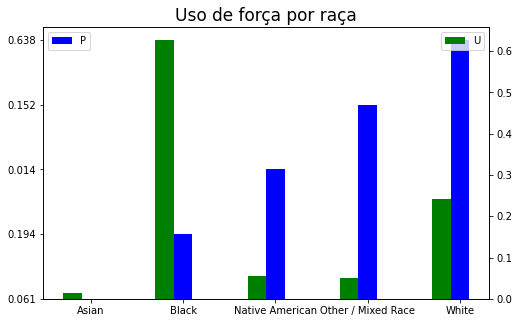

In [22]:
X = np.arange(len(census_2010_df))
plt.rcParams['xtick.labelsize'] = 10 # Definindo tamanho da fonte do título do eixo x
plt.rcParams['ytick.labelsize'] = 10 # Definindo tamanho da fonte do título do eixo y
plt.figure(figsize=(8, 5)) # Definindo tamanho do gráfico
ax = plt.subplot(111)
ax.bar(X, census_2010.values(), width=0.2, color='b', align='center')
ax2 = ax.twinx()
ax2.bar(X-0.2, tmp.ForceType, width=0.2, color='g', align='center')
ax.legend('População')
ax2.legend('Uso de força')
plt.xticks(X, census_2010.keys())
plt.title("Uso de força por raça", fontsize=17)
plt.show()

In [23]:
police2['Race'].value_counts()

Black                 12081
White                  4669
Native American        1065
Other / Mixed Race      795
Asian                   288
Unknown                 205
not recorded            157
Pacific Islander          2
Name: Race, dtype: int64

**Verificando graficamente, como se comporta a target**

In [24]:
# Data:
labels = lista_ft
frequency = []
for i in lista_ft:
    frequency.append(police2['ForceType'].value_counts()[i])

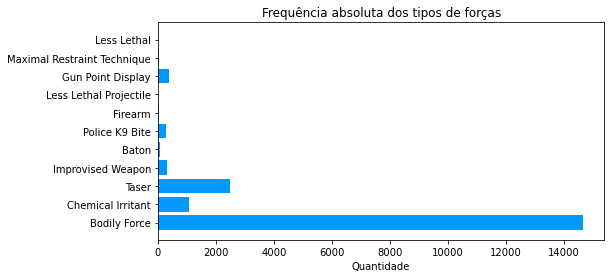

In [25]:
# Plot template
plt.figure(figsize=(8,4))
plt.title('Frequência absoluta dos tipos de forças'); plt.xlabel('Quantidade')
# Plot 
plt.barh(labels, frequency, color='#0099ff')
plt.show()

*Pelo gráfico acima, é possível identificar que o tipo de violência policial mais comum é a causada por força corporal, fato que pode ser constatado por acontecimentos recentes como o caso de George Floyd que foi sufocado por um policial: https://g1.globo.com/mundo/noticia/2020/05/29/preso-policial-suspeito-de-participar-da-morte-de-george-floyd-em-minneapolis-diz-imprensa-dos-eua.ghtml*

**Análise qualitativa da feature Race e a target ForceType**

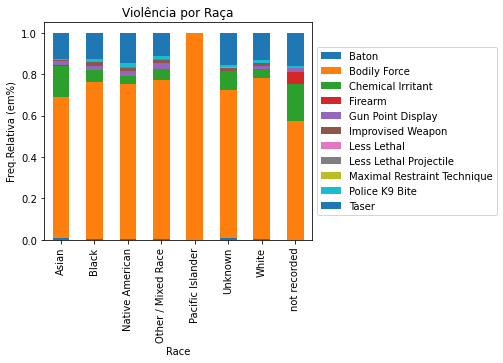

In [26]:
#Analisando a frequência do tipo de violência (target ForceType) considerando Raça (feature Race):
cross = pd.crosstab(police2["Race"], police2["ForceType"], normalize="index")
plot = cross.plot(kind='bar', stacked=True,title='Violência por Raça')
plt.ylabel('Freq.Relativa (em%)')  

 

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

*O gráfico permite entender que BodilyForce é o tipo mais comum de violência policial entre as raças.*

In [27]:
#Não seria bom tirar o pacific Islander??

**Análise qualitativa da feature Sex e a target ForceType**

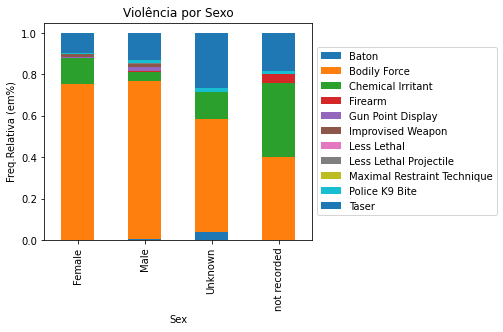

In [28]:
#Analisando a frequência do tipo de violência (target ForceType) considerando Sexo (feature Sex):
cross = pd.crosstab(police2["Sex"], police2["ForceType"], normalize="index")
plot = cross.plot(kind='bar', stacked=True,title='Violência por Sexo')
plt.ylabel('Freq.Relativa (em%)')  

 

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

**Análise qualitativa da feature Precinct e a target ForceType**

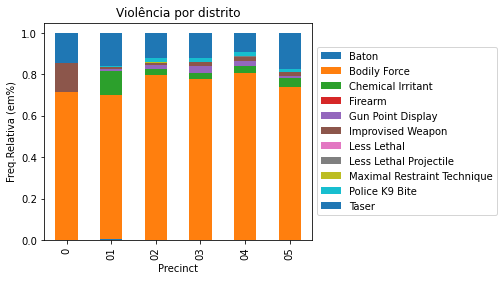

In [29]:
#Analisando a frequência do tipo de violência (target ForceType) considerando Distrito (feature Precinct):
cross = pd.crosstab(police2["Precinct"], police2["ForceType"], normalize="index")
plot = cross.plot(kind='bar', stacked=True,title='Violência por distrito')
plt.ylabel('Freq.Relativa (em%)')  

 

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

**Análise qualitativa da feature SubjectInjury e a target ForceType**

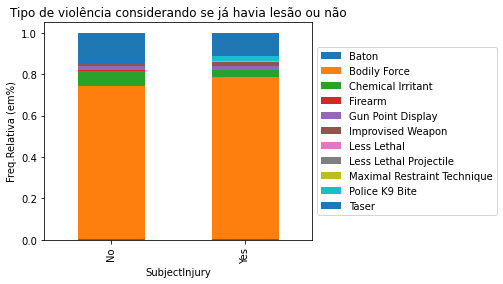

In [30]:
#Analisando a frequência do tipo de violência (target ForceType) considerando SubjectInjury (feature SubjectInjury):
cross = pd.crosstab(police2["SubjectInjury"], police2["ForceType"], normalize="index")
plot = cross.plot(kind='bar', stacked=True,title='Tipo de violência considerando se já havia lesão ou não')
plt.ylabel('Freq.Relativa (em%)')  

 

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#### Análise de Features Quantitativas 

----------------------------------------------
Bodily Force
Média Idade: 29.144524849808846 Variância Idade: 106.52522980084166
Média City Calls: 331453.4809530311 Variância City Calls: 719962442.4797399
Média Precint Calls: 68978.75081922447 Variância Precint Calls: 195779493.17817542
Média Neighbourhood Calls: 11503.133055707263 Variância Neighbourhood Calls: 94809979.22916976


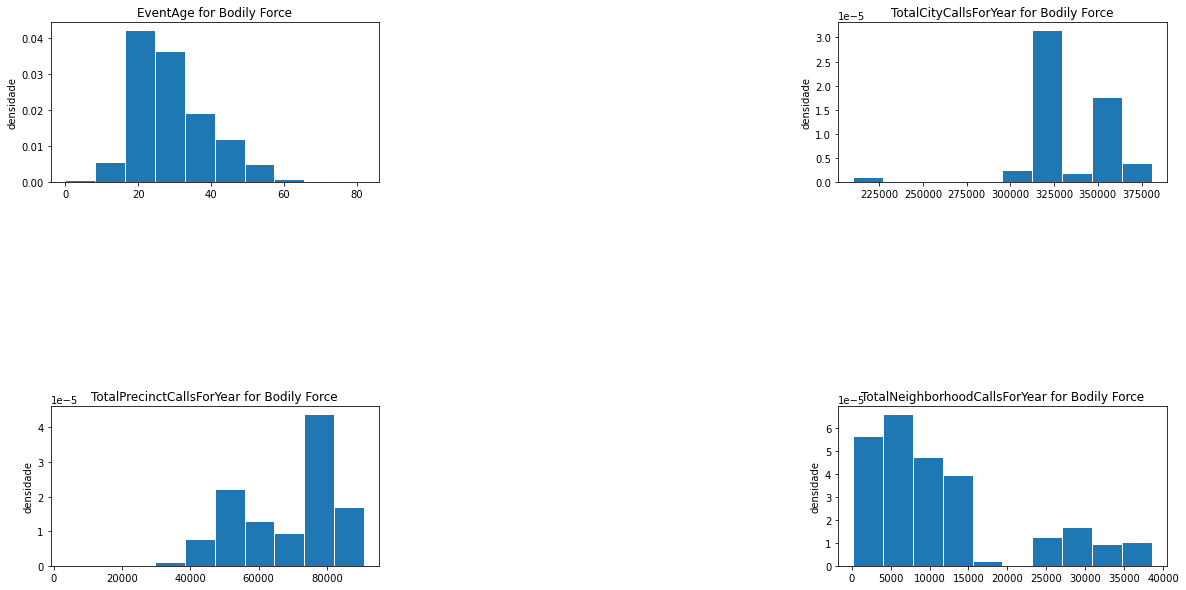

----------------------------------------------
Chemical Irritant
Média Idade: 25.06641366223909 Variância Idade: 109.21305892083879
Média City Calls: 330379.5483870968 Variância City Calls: 439650260.5327922
Média Precint Calls: 62847.97912713473 Variância Precint Calls: 176134173.89320114
Média Neighbourhood Calls: 18344.511385199243 Variância Neighbourhood Calls: 135624277.70689845


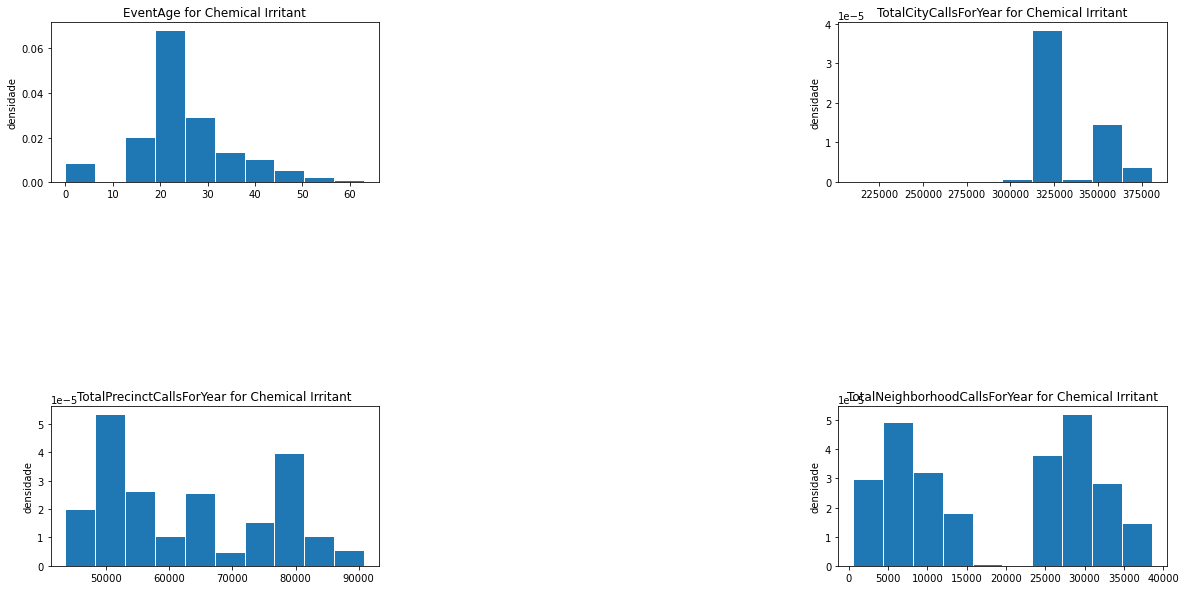

----------------------------------------------
Taser
Média Idade: 29.831305758313057 Variância Idade: 109.79546579937431
Média City Calls: 329503.1066504461 Variância City Calls: 601314280.1496731
Média Precint Calls: 65945.23398215734 Variância Precint Calls: 201392598.12657136
Média Neighbourhood Calls: 12349.144768856448 Variância Neighbourhood Calls: 107426600.46787733


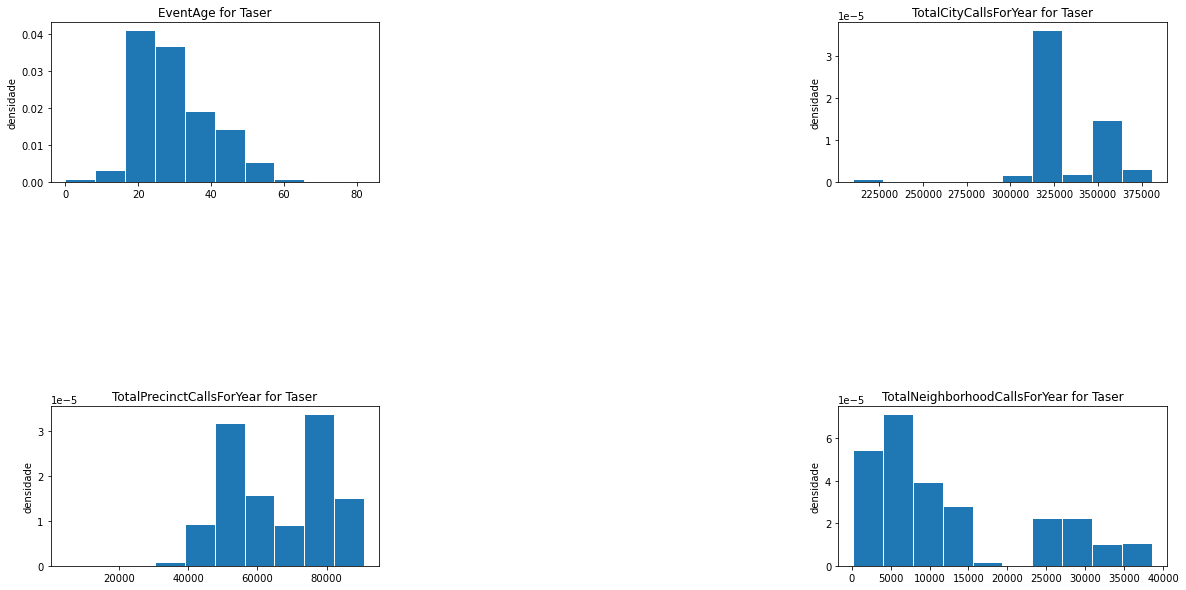

----------------------------------------------
Improvised Weapon
Média Idade: 29.157728706624606 Variância Idade: 96.71554925528083
Média City Calls: 335558.4195583596 Variância City Calls: 621740992.09873
Média Precint Calls: 73420.214511041 Variância Precint Calls: 172347942.50447267
Média Neighbourhood Calls: 10800.287066246057 Variância Neighbourhood Calls: 69451941.52176256


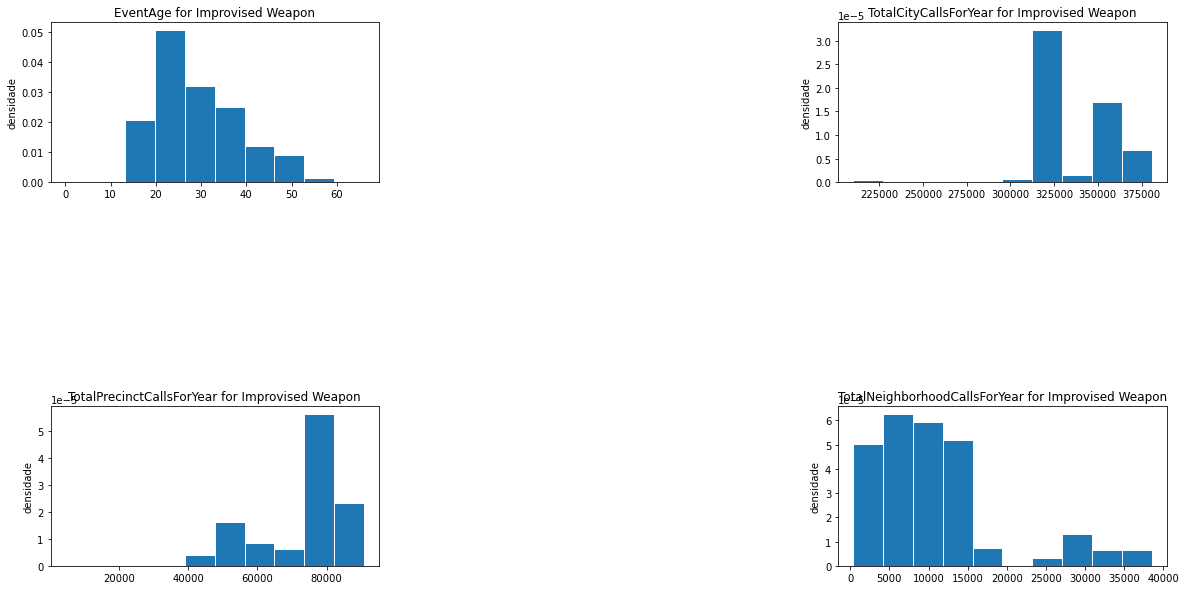

----------------------------------------------
Baton
Média Idade: 27.8 Variância Idade: 104.20000000000002
Média City Calls: 326445.5090909091 Variância City Calls: 248501171.14343438
Média Precint Calls: 60970.36363636364 Variância Precint Calls: 211601897.087542
Média Neighbourhood Calls: 12611.672727272728 Variância Neighbourhood Calls: 106208319.7057239


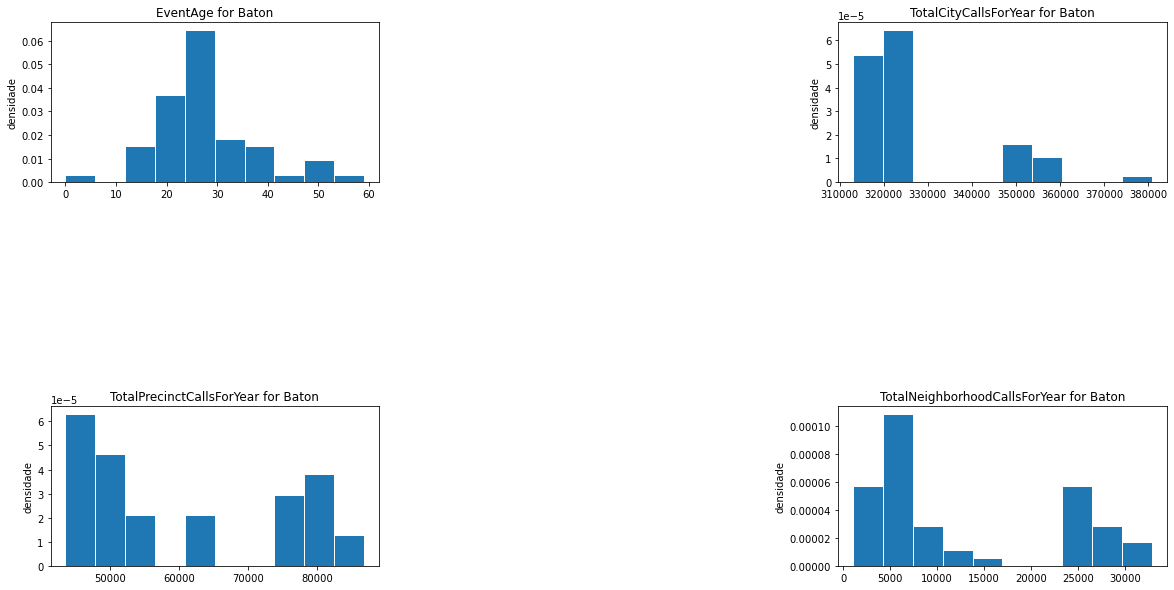

----------------------------------------------
Police K9 Bite
Média Idade: 26.390334572490705 Variância Idade: 97.54483160406124
Média City Calls: 332770.5130111524 Variância City Calls: 453279857.377628
Média Precint Calls: 74361.46468401486 Variância Precint Calls: 152172112.37654665
Média Neighbourhood Calls: 6491.416356877324 Variância Neighbourhood Calls: 19304654.23644787


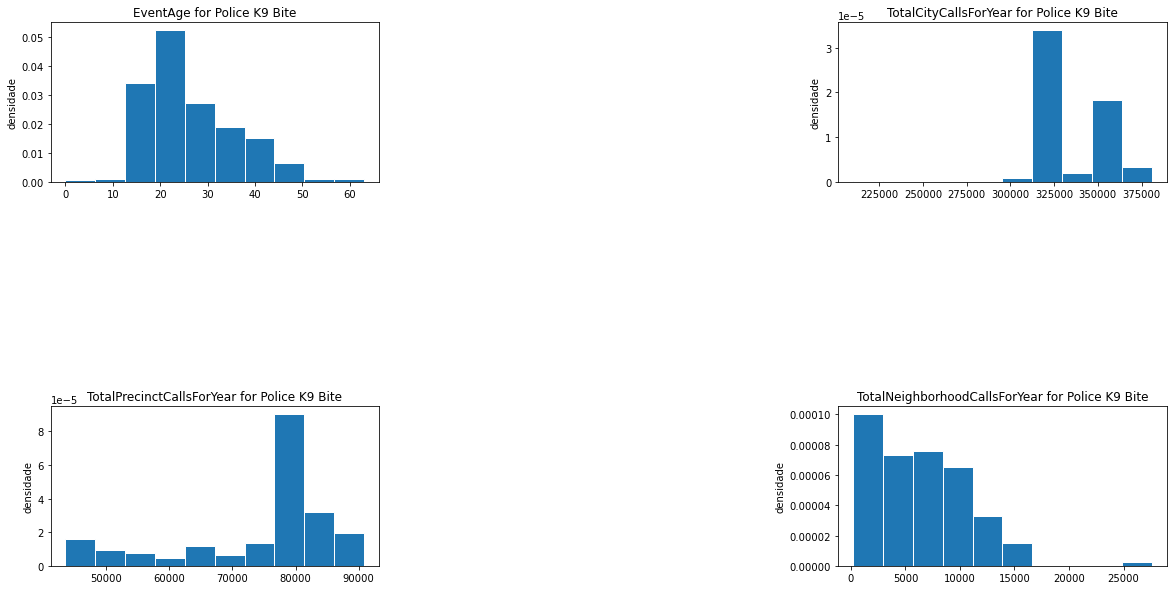

----------------------------------------------
Firearm
Média Idade: 22.5 Variância Idade: 198.3048780487805
Média City Calls: 329214.4285714286 Variância City Calls: 226363400.0557492
Média Precint Calls: 71748.38095238095 Variância Precint Calls: 177597641.60743323
Média Neighbourhood Calls: 8610.642857142857 Variância Neighbourhood Calls: 46751078.771777


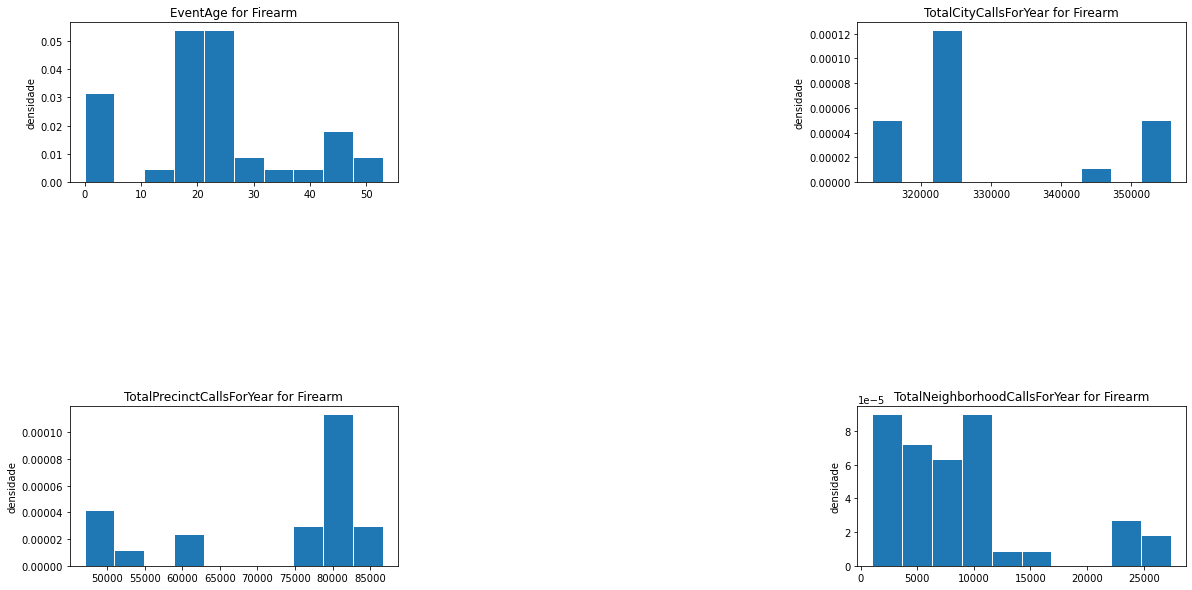

----------------------------------------------
Less Lethal Projectile
Média Idade: 31.0 Variância Idade: 92.13333333333334
Média City Calls: 345106.4375 Variância City Calls: 328375503.59583336
Média Precint Calls: 77740.6875 Variância Precint Calls: 115541056.22916667
Média Neighbourhood Calls: 9198.5 Variância Neighbourhood Calls: 20501010.4


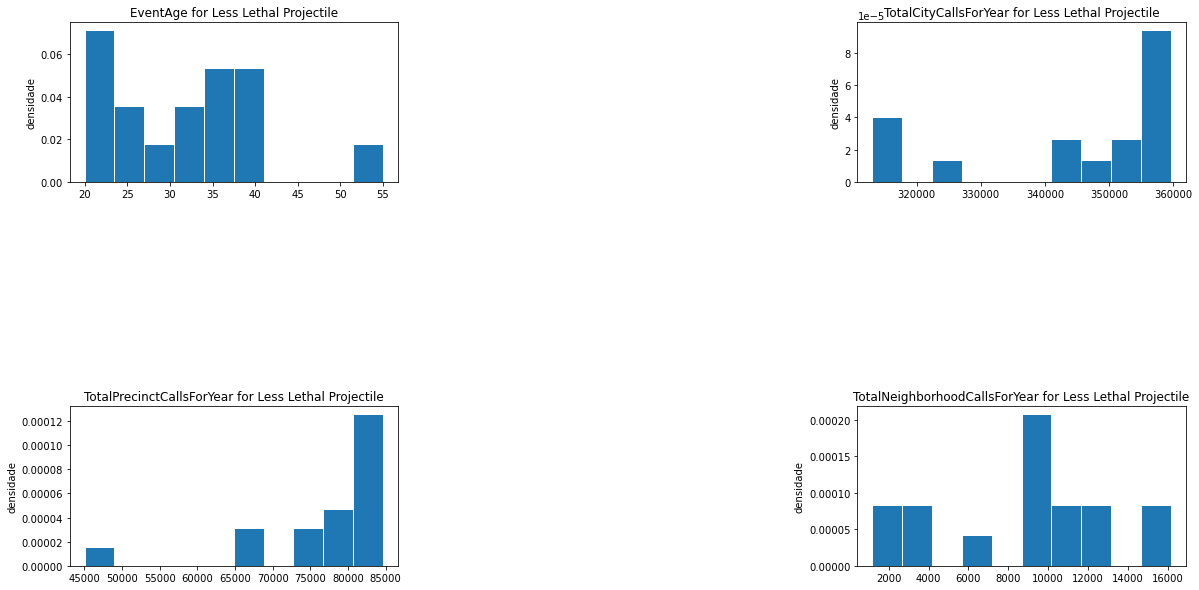

----------------------------------------------
Gun Point Display
Média Idade: 29.731506849315068 Variância Idade: 104.30683426162881
Média City Calls: 345074.2082191781 Variância City Calls: 370665603.18180245
Média Precint Calls: 74737.65753424658 Variância Precint Calls: 130776906.14887832
Média Neighbourhood Calls: 8641.271232876712 Variância Neighbourhood Calls: 48989949.41249435


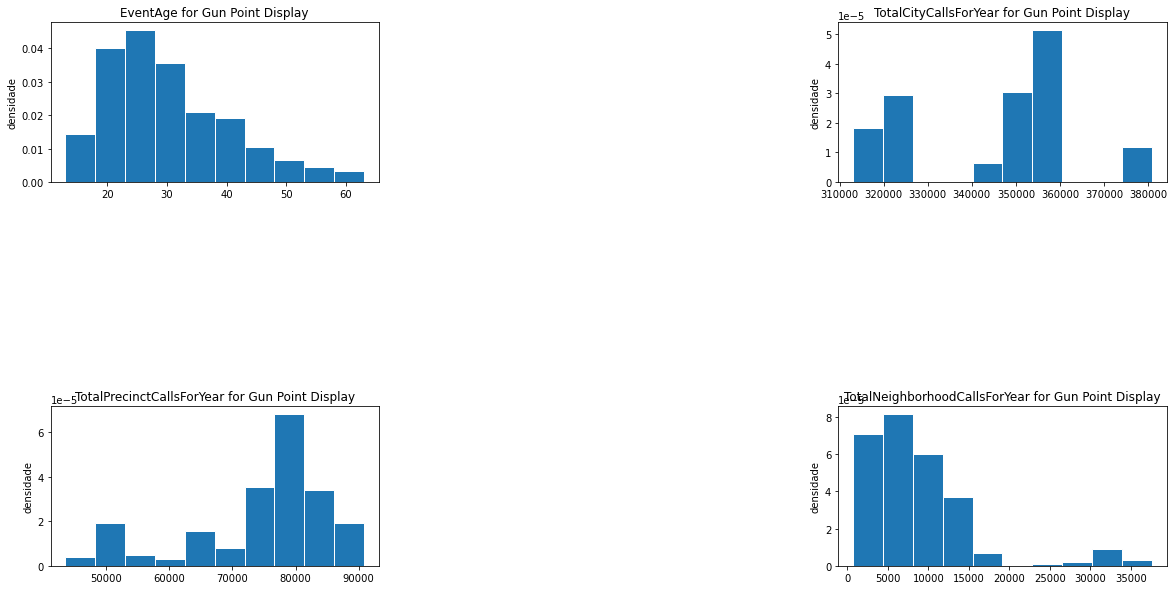

----------------------------------------------
Maximal Restraint Technique
Média Idade: 26.392857142857142 Variância Idade: 51.58068783068784
Média City Calls: 288861.14285714284 Variância City Calls: 1073976028.571428
Média Precint Calls: 55053.07142857143 Variância Precint Calls: 124915051.25396822
Média Neighbourhood Calls: 10463.42857142857 Variância Neighbourhood Calls: 124641933.66137569


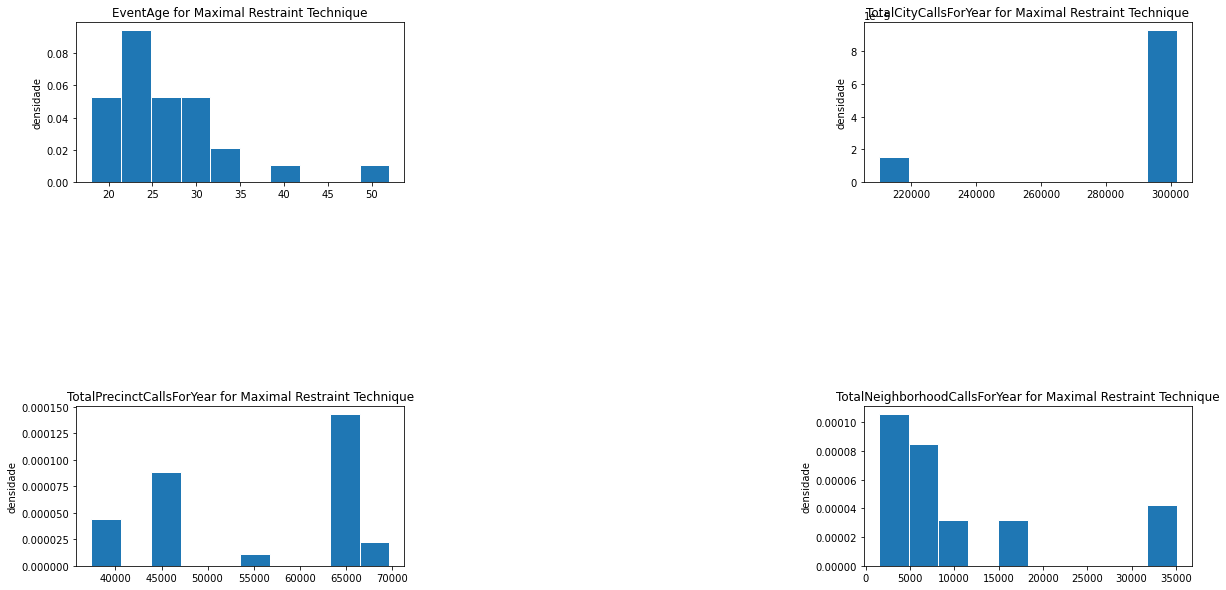

----------------------------------------------
Less Lethal
Média Idade: 26.0 Variância Idade: 0.0
Média City Calls: 210034.0 Variância City Calls: 0.0
Média Precint Calls: 43890.5 Variância Precint Calls: 85425520.5
Média Neighbourhood Calls: 10578.0 Variância Neighbourhood Calls: 74639762.0


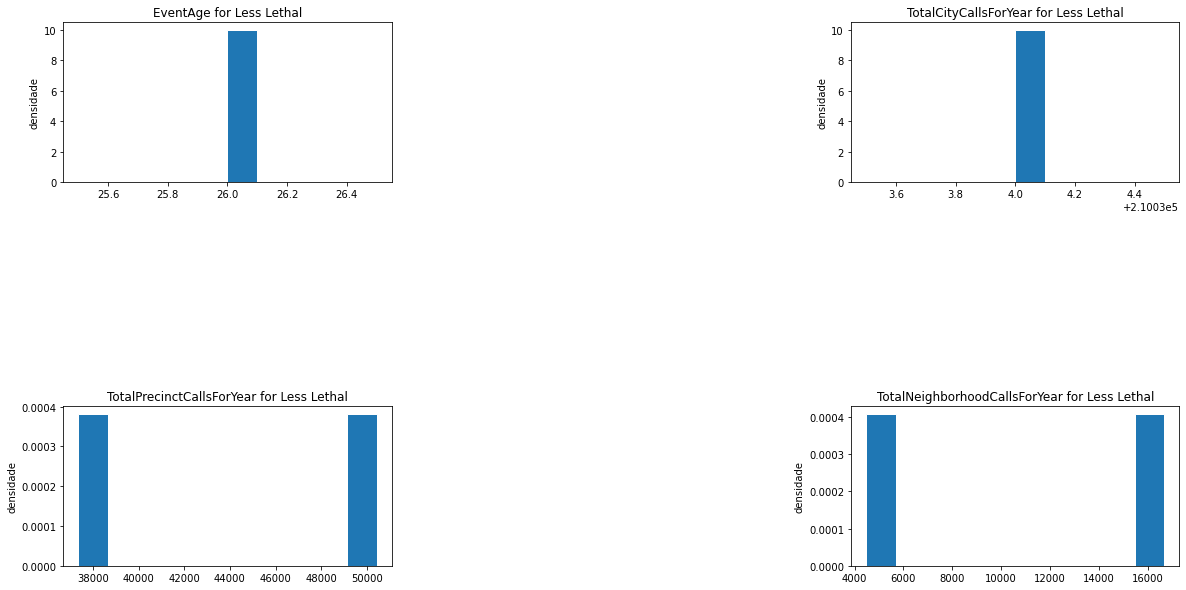

In [31]:
for ft in lista_ft:
    
    plt.figure(figsize=(20, 10))
    
    df_ = police2.loc[police2['ForceType'] == ft, :]
    print('----------------------------------------------')
    print(ft)
    
    plt.subplot(331)
    plt.hist(df_.EventAge, edgecolor='white', density=True)
    plt.ylabel('densidade')
    plt.title('EventAge for {}'.format(ft))
    print(f'Média Idade: {df_.EventAge.mean()} Variância Idade: {df_.EventAge.var()}')
    
    plt.subplot(333)
    plt.hist(df_.TotalCityCallsForYear, edgecolor='white', density=True)
    plt.ylabel('densidade')
    plt.title('TotalCityCallsForYear for {0}'.format(ft))
    print(f'Média City Calls: {df_.TotalCityCallsForYear.mean()} Variância City Calls: {df_.TotalCityCallsForYear.var()}')
    
    plt.subplot(337)
    plt.hist(df_.TotalPrecinctCallsForYear, edgecolor='white', density=True)
    plt.ylabel('densidade')
    plt.title('TotalPrecinctCallsForYear for {}'.format(ft))
    print(f'Média Precint Calls: {df_.TotalPrecinctCallsForYear.mean()} Variância Precint Calls: {df_.TotalPrecinctCallsForYear.var()}')
    
    plt.subplot(339)
    plt.hist(df_.TotalNeighborhoodCallsForYear, edgecolor='white', density=True)
    plt.ylabel('densidade')
    plt.title('TotalNeighborhoodCallsForYear for {}'.format(ft))
    print(f'Média Neighbourhood Calls: {df_.TotalNeighborhoodCallsForYear.mean()} Variância Neighbourhood Calls: {df_.TotalNeighborhoodCallsForYear.var()}')

    plt.show()

# Pré processamento

In [32]:
police3 = pd.get_dummies(police2, prefix=['Prob', '911', 'PriOff', 'SubInj', 'Race', 'Sex', 'TyOfRes', 'Precinct', 'Nbh'], columns=['Problem', 'Is911Call', 'PrimaryOffense', 'SubjectInjury', 'Race', 'Sex', 'TypeOfResistance', 'Precinct', 'Neighborhood'])
police3

,ForceType,EventAge,TotalCityCallsForYear,TotalPrecinctCallsForYear,TotalNeighborhoodCallsForYear,Prob_Aircraft Crash in City,Prob_Animal Bite,Prob_Animal Call,Prob_Assault Report Only,Prob_Assault in Progress,...,Nbh_Ventura Village,Nbh_Victory,Nbh_Waite Park,Nbh_Webber - Camden,Nbh_Wenonah,Nbh_West Calhoun,Nbh_Whittier,Nbh_Willard - Hay,Nbh_Windom,Nbh_Windom Park
1,Bodily Force,30.0,322402,84018.0,10316,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,Bodily Force,40.0,322402,46998.0,23458,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bodily Force,46.0,322402,80434.0,13679,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Bodily Force,36.0,322402,80434.0,2992,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Bodily Force,34.0,322402,46998.0,23458,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32057,Bodily Force,31.0,210034,50426.0,6201,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
32058,Improvised Weapon,52.0,210034,52255.0,7362,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32073,Bodily Force,19.0,210034,37666.0,2361,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32105,Bodily Force,28.0,210034,37666.0,2361,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
X = police3.iloc[:, 1:].values
y = police3.iloc[:, 0].values
print(y)
print(X)

['Bodily Force' 'Bodily Force' 'Bodily Force' ... 'Bodily Force'
 'Bodily Force' 'Bodily Force']
[[3.00000e+01 3.22402e+05 8.40180e+04 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [4.00000e+01 3.22402e+05 4.69980e+04 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [4.60000e+01 3.22402e+05 8.04340e+04 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 ...
 [1.90000e+01 2.10034e+05 3.76660e+04 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [2.80000e+01 2.10034e+05 3.76660e+04 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [2.70000e+01 2.10034e+05 3.76660e+04 ... 0.00000e+00 0.00000e+00
  0.00000e+00]]


In [34]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[1 1 1 ... 1 1 1]


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [36]:
print(X_train)

[[4.40000e+01 3.13095e+05 7.56770e+04 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [2.50000e+01 3.24520e+05 7.88520e+04 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [2.20000e+01 3.22402e+05 4.89010e+04 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 ...
 [2.90000e+01 3.14926e+05 4.50480e+04 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [2.90000e+01 3.14926e+05 8.06120e+04 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [6.60000e+01 3.22402e+05 8.04340e+04 ... 1.00000e+00 0.00000e+00
  0.00000e+00]]


In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 0:4] = sc.fit_transform(X_train[:, 0:4])
X_test[:, 0:4] = sc.transform(X_test[:, 0:4])

# Testando modelo de Regressão Logística

In [38]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [39]:
y_pred = classifier.predict(X_test)
array_logistic = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
df_logistic = pd.DataFrame(array_logistic, columns=['Prediction', 'Test'])
df_logistic

,Prediction,Test
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
3848,1,10
3849,1,4
3850,1,1
3851,1,1


In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[   0   12    1    0    0    0    0    0    0    0    0]
 [   0 2900    8    0    3    0    0    0    0    3   20]
 [   0  172   36    1    0    0    0    0    0    0    1]
 [   0    4    0    1    0    0    0    0    0    0    0]
 [   0   72    0    0    5    0    0    0    0    0    1]
 [   0   69    0    0    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0    0    0]
 [   0    4    0    0    0    0    0    0    0    0    0]
 [   0    7    0    0    0    0    0    0    0    0    0]
 [   0   51    0    0    0    0    0    0    0    3    0]
 [   0  454    4    0    0    0    0    0    0    2   18]]


0.7690111601349597

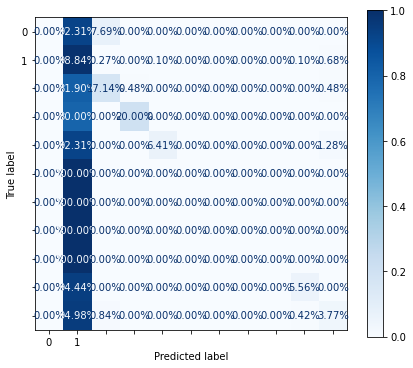

In [41]:
fig, ax = plt.subplots(figsize=(7, 6))
plot_confusion_matrix(classifier.fit(X_train, y_train), X_test, y_test, 
                      normalize='true', display_labels=['0', '1'], 
                      cmap=plt.cm.Blues, ax=ax, values_format='.2%')

# Testando modelo Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
modelo_tree = classifier.fit(X_train, y_train)
# classifier.feature_importance (Barbara
# https://mljar.com/blog/visualize-decision-tree/

In [43]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 1]]


In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
#print(cm)
accuracy_score(y_test, y_pred)

0.7472099662600571

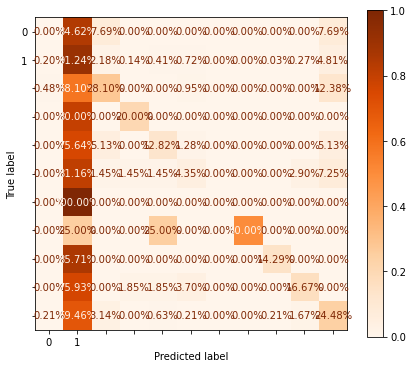

In [45]:
fig, ax = plt.subplots(figsize=(7, 6))
plot_confusion_matrix(modelo_tree, X_test, y_test, 
                      normalize='true', display_labels=['0', '1'], 
                      cmap=plt.cm.Oranges, ax=ax, values_format='.2%')

# Testando Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
modelo_random = classifier.fit(X_train, y_train)
modelo_random

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [47]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 1]]


In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
#print(cm)
accuracy_score(y_test, y_pred)

0.7412405917466909

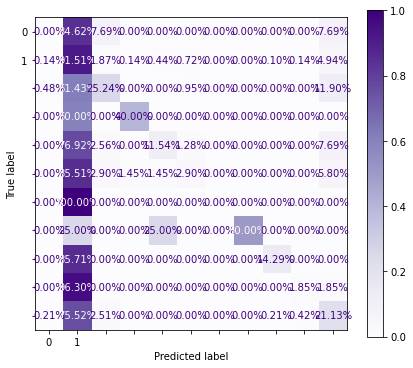

In [49]:
fig, ax = plt.subplots(figsize=(7, 6))
plot_confusion_matrix(modelo_random, X_test, y_test, 
                      normalize='true', display_labels=['0', '1'], 
                      cmap=plt.cm.Purples, ax=ax, values_format='.2%')

## Tentando melhorar o desempenho 

Trocaremos os ForceType que não são Bodily Force por uma categoria só

In [50]:
filtra_linhas = police3['ForceType'] != 'Bodily Force'
filtra_linhas2 = police3['ForceType'] == 'Bodily Force'
df_auxiliar = police3.loc[filtra_linhas, :]
df_auxiliar2 = police3.loc[filtra_linhas2, :]

df_auxiliar['ForceType'] = 'Weapon'

police4 = pd.concat([df_auxiliar, df_auxiliar2]).sort_index()
police4.head(10)

,ForceType,EventAge,TotalCityCallsForYear,TotalPrecinctCallsForYear,TotalNeighborhoodCallsForYear,Prob_Aircraft Crash in City,Prob_Animal Bite,Prob_Animal Call,Prob_Assault Report Only,Prob_Assault in Progress,...,Nbh_Ventura Village,Nbh_Victory,Nbh_Waite Park,Nbh_Webber - Camden,Nbh_Wenonah,Nbh_West Calhoun,Nbh_Whittier,Nbh_Willard - Hay,Nbh_Windom,Nbh_Windom Park
1,Bodily Force,30.0,322402,84018.0,10316,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,Bodily Force,40.0,322402,46998.0,23458,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bodily Force,46.0,322402,80434.0,13679,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Bodily Force,36.0,322402,80434.0,2992,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Bodily Force,34.0,322402,46998.0,23458,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Weapon,23.0,322402,46998.0,23458,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Weapon,17.0,322402,84018.0,5577,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Bodily Force,17.0,322402,48901.0,2071,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
10,Bodily Force,22.0,322402,46998.0,23458,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,Bodily Force,15.0,322402,80434.0,1123,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
X = police4.iloc[:, 1:].values
y = police4.iloc[:, 0].values

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 0:4] = sc.fit_transform(X_train[:, 0:4])
X_test[:, 0:4] = sc.transform(X_test[:, 0:4])

 #### Tentando Logistico mais uma vez

In [52]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
array_logistic = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
df_logistic = pd.DataFrame(array_logistic, columns=['Prediction', 'Test'])
df_logistic

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2888   46]
 [ 835   84]]


0.7713470023358422

#### Tentando Decision Tree de novo

In [53]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
#print(cm)
accuracy_score(y_test, y_pred)

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


0.7700493122242409

##### Tentando Random Forest de novo

In [54]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
#print(cm)
accuracy_score(y_test, y_pred)

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


0.7539579548403841

## Testando o cálculo de feature importance - sugestão barbara

### Com todos os ForceType

In [55]:
X = police3.iloc[:, 1:].values
y = police3.iloc[:, 0].values

In [56]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[1 1 1 ... 1 1 1]


In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[:, 0:4] = sc.fit_transform(X[:, 0:4])

In [58]:
clf = DecisionTreeClassifier()
clf.fit(X, y)

feat_importance = clf.tree_.compute_feature_importances(normalize=False)
print("feat importance = " + str(feat_importance))

feat importance = [3.27363477e-02 1.04637180e-02 1.11368711e-02 1.65406961e-02
 7.87673184e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.32548024e-03 1.03496884e-03 9.98739804e-06 2.27940828e-04
 3.95978680e-05 4.71200662e-04 9.51787630e-05 7.23200894e-04
 3.87127590e-04 8.11718621e-05 2.40481376e-04 2.52949987e-05
 2.67609797e-04 2.36434694e-04 0.00000000e+00 2.59578445e-05
 7.43946814e-04 0.00000000e+00 1.26465053e-03 1.22203256e-03
 5.39551952e-04 8.33295716e-05 8.25310777e-05 1.03186462e-05
 0.00000000e+00 7.47720499e-04 8.74630981e-04 1.62522321e-04
 1.44620294e-04 2.52519109e-03 7.78118621e-04 2.37253562e-04
 1.65035114e-03 6.53302264e-04 0.00000000e+00 6.13995872e-04
 1.75335978e-05 0.00000000e+00 1.70747972e-04 1.21323420e-03
 2.52690521e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 6.35293835e-04 2.62921936e-04 0.00000000e+00
 2.44286309e-05 0.00000000e+00 2.87618928e-05 1.16832435e-04
 8.19154556e-04 1.65162939e-04 5.61500968e-04 2.14693152e-04
 6.072

In [59]:
# Fazendo um data frame com o nome das suas colunas e suas respectivas importâncias
df1 = pd.DataFrame()
df1['feature_importance'] = feat_importance
df1['nome'] = police3.columns[1:]
df1.sort_values(by = 'feature_importance', ascending = False).head(13)

,feature_importance,nome
0,0.032736,EventAge
3,0.016541,TotalNeighborhoodCallsForYear
2,0.011137,TotalPrecinctCallsForYear
1,0.010464,TotalCityCallsForYear
222,0.004547,PriOff_FORCE
368,0.004278,TyOfRes_Tensed
345,0.004266,Race_Black
342,0.003648,SubInj_No
371,0.003603,TyOfRes_Verbal Non-Compliance
350,0.003591,Race_White


In [60]:
filtra_linhas = df1['feature_importance'] > 0.003 
df2 = df1.loc[filtra_linhas, :]

features_list = []
for feat in df2['nome']:
    features_list.append(feat)
    
features_list.append('ForceType')

police5 = police3[features_list].copy()
police5.head()

,EventAge,TotalCityCallsForYear,TotalPrecinctCallsForYear,TotalNeighborhoodCallsForYear,Prob_Suspicious Person,PriOff_FORCE,SubInj_No,Race_Black,Race_White,TyOfRes_Commission of Crime,TyOfRes_Fled on Foot,TyOfRes_Tensed,TyOfRes_Verbal Non-Compliance,Precinct_01,ForceType
1,30.0,322402,84018.0,10316,0,0,1,1,0,0,0,0,0,0,Bodily Force
2,40.0,322402,46998.0,23458,0,0,1,1,0,1,0,0,0,1,Bodily Force
4,46.0,322402,80434.0,13679,0,0,0,1,0,0,0,1,0,0,Bodily Force
5,36.0,322402,80434.0,2992,0,0,1,1,0,0,0,1,0,0,Bodily Force
6,34.0,322402,46998.0,23458,1,0,1,1,0,0,0,1,0,1,Bodily Force


##### Agora vamos tentar ver se melhora

In [61]:
X = police5.iloc[:, :-1].values
y = police5.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
#print(cm)
accuracy_score(y_test, y_pred)

[['Bodily Force' 'Bodily Force']
 ['Taser' 'Bodily Force']
 ['Bodily Force' 'Bodily Force']
 ...
 ['Bodily Force' 'Bodily Force']
 ['Bodily Force' 'Bodily Force']
 ['Bodily Force' 'Bodily Force']]


0.7412405917466909

### Com apenas 2 ForceType

In [62]:
X = police4.iloc[:, 1:].values
y = police4.iloc[:, 0].values

In [63]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 0 0 ... 0 0 0]


In [64]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[:, 0:4] = sc.fit_transform(X[:, 0:4])

In [65]:
clf = DecisionTreeClassifier()
clf.fit(X, y)

feat_importance = clf.tree_.compute_feature_importances(normalize=False)
print("feat importance = " + str(feat_importance))

feat importance = [2.84158101e-02 8.26565174e-03 1.42997227e-02 1.71616490e-02
 7.77177469e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.41523081e-03 9.05230829e-04 8.62821453e-05 5.97478633e-04
 0.00000000e+00 5.35968598e-04 0.00000000e+00 2.35947019e-04
 1.16661575e-04 1.77717627e-04 1.81432915e-04 0.00000000e+00
 0.00000000e+00 2.20489760e-04 7.60796335e-05 0.00000000e+00
 9.70868228e-04 0.00000000e+00 1.41309071e-03 1.17044902e-03
 1.77208281e-04 8.87259655e-05 5.76840988e-07 0.00000000e+00
 0.00000000e+00 5.44302028e-04 6.80732844e-04 2.34232936e-04
 6.44510455e-05 2.17156526e-03 5.85405851e-04 0.00000000e+00
 1.36378319e-03 6.91878938e-04 0.00000000e+00 1.01259833e-04
 0.00000000e+00 0.00000000e+00 3.00058460e-04 1.02313127e-03
 2.70979958e-03 0.00000000e+00 6.61156354e-05 0.00000000e+00
 0.00000000e+00 5.13735192e-04 2.63926740e-04 0.00000000e+00
 4.84546430e-05 0.00000000e+00 1.84589116e-05 3.53341325e-05
 5.77061497e-04 2.07419917e-04 4.43316599e-04 1.62343244e-04
 4.697

In [66]:
# Fazendo um novo data frame com o nome das colunas e suas respectivas importâncias
df3= pd.DataFrame()
df3['feature_importance'] = feat_importance
df3['nome'] = police4.columns[1:]
df3.sort_values(by = 'feature_importance', ascending = False)

,feature_importance,nome
0,0.028416,EventAge
3,0.017162,TotalNeighborhoodCallsForYear
2,0.014300,TotalPrecinctCallsForYear
1,0.008266,TotalCityCallsForYear
342,0.004279,SubInj_No
...,...,...
308,0.000000,PriOff_SHOPLF
309,0.000000,PriOff_SHOST
310,0.000000,PriOff_SHOTGN
314,0.000000,PriOff_STOLMV


In [67]:
filtra_linhas = df3['feature_importance'] > 0.003 
df4 = df3.loc[filtra_linhas, :]

features_list2 = []
for feat in df3['nome']:
    features_list2.append(feat)
    
features_list2.append('ForceType')

police6 = police4[features_list].copy()
police6.head()

,EventAge,TotalCityCallsForYear,TotalPrecinctCallsForYear,TotalNeighborhoodCallsForYear,Prob_Suspicious Person,PriOff_FORCE,SubInj_No,Race_Black,Race_White,TyOfRes_Commission of Crime,TyOfRes_Fled on Foot,TyOfRes_Tensed,TyOfRes_Verbal Non-Compliance,Precinct_01,ForceType
1,30.0,322402,84018.0,10316,0,0,1,1,0,0,0,0,0,0,Bodily Force
2,40.0,322402,46998.0,23458,0,0,1,1,0,1,0,0,0,1,Bodily Force
4,46.0,322402,80434.0,13679,0,0,0,1,0,0,0,1,0,0,Bodily Force
5,36.0,322402,80434.0,2992,0,0,1,1,0,0,0,1,0,0,Bodily Force
6,34.0,322402,46998.0,23458,1,0,1,1,0,0,0,1,0,1,Bodily Force


In [68]:
X = police6.iloc[:, :-1].values
y = police6.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
#print(cm)
accuracy_score(y_test, y_pred)

[['Bodily Force' 'Bodily Force']
 ['Bodily Force' 'Bodily Force']
 ['Weapon' 'Bodily Force']
 ...
 ['Bodily Force' 'Bodily Force']
 ['Bodily Force' 'Bodily Force']
 ['Bodily Force' 'Bodily Force']]


0.7581105631975085

In [69]:
# Quando ajeitar o problema que tá dando, eu coloco mais mapas de calor e coloco as legendas que precisa ter, por enquanto tá bem estranho!!